# Fase Final Proyecto Integrador
# PROYECTO DE ANALÍTICA PARA LA INNOVACIÓN


#### Este análisis es relacionado con las ventas por día del negocio de abarrotes 'Chicken Farm' por cada sucursal (Cantera y Reliz) del presente año 2021. 
#### El propósito de este proyecto es brindar al cliente dueño del negocio 'Chicken Farm' un análisis a profunidad de las ventas de su negocio y darle un modelo o solución que le ayude a incrementar las mismas.

In [1]:
# Importación de librerías
# En python podemos importar paquetes de software y ponerles un alias usando "as"
import numpy as np # Numpy es una librería de programación numérica super rápida
import scipy as sp # Scipy tiene funcionos estadísticas
import matplotlib as mpl # Importa matplotlib, librería para graficar
import matplotlib.cm as cm # nos permite rápido acceso a colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd # Nos permite manejar data como dataframes
import seaborn as sns # Define estilos y nos da más opciones para plotting

### ANÁLISIS EXPLORATORIO DEL DATASET

In [2]:
# Vamos a leer nuestro dataset de ventas
df =  pd.read_csv ('Ventas_Sucursales.csv')

In [4]:
#Con esta función solamente verificamos los primeros registros de nuestro dataset
df.head(20)

,folio,caja,fecha,hora,producto,primer nombre,subtotal,iva,total,sucursal,mes,dia,quantity,familia,subfamilia,subsubfamilia
0,132182,1,11/29/2021,18:40,SALSA ROJA,SALSA,20.00,0.00,20.00,Relis,11,lunes,1,ABARROTES Y COMIDA,COMIDA PREPARADA,SALSAS Y CHILES
1,132181,1,11/29/2021,18:39,TOSTADAS DE NOPAL VERDE VIDA,TOSTADAS,33.50,0.00,33.50,Relis,11,lunes,1,ABARROTES Y COMIDA,ABARROTES,TORTILLAS Y TOSTADAS
2,132180,1,11/29/2021,18:11,PECHUGA RELLENA PHILADELPHIA,PECHUGA,97.00,0.00,97.00,Relis,11,lunes,1,PRODUCTOS DE BASCULA,POLLO,POLLO
3,132180,1,11/29/2021,18:11,QUINOA PIMIENTOS,QUINOA,37.07,5.93,43.00,Relis,11,lunes,1,ABARROTES Y COMIDA,COMIDA PREPARADA,FLAUTAS
4,132180,1,11/29/2021,18:11,CALDO DE POLLO MEDIO,CALDO,35.00,0.00,35.00,Relis,11,lunes,1,ABARROTES Y COMIDA,COMIDA PREPARADA,ADEREZOS
5,132179,1,11/29/2021,18:08,CARTERA 15 HUEVOS,CARTERA,49.00,0.00,49.00,Relis,11,lunes,1,ABARROTES Y COMIDA,ABARROTES,HUEVO Y LACTEO
6,132179,1,11/29/2021,18:08,MILANESA NATURAL,MILANESA,251.58,0.00,251.58,Relis,11,lunes,1,PRODUCTOS DE BASCULA,POLLO,POLLO
7,132178,1,11/29/2021,17:51,OBLEA DE CACAO AMAREA 50 GR,OBLEA,38.00,0.00,38.00,Relis,11,lunes,1,ABARROTES Y COMIDA,ABARROTES,"CEREALES, GALLETAS Y PASTAS"
8,132178,1,11/29/2021,17:51,TORTILLA HARINA,TORTILLA,25.00,0.00,25.00,Relis,11,lunes,1,ABARROTES Y COMIDA,ABARROTES,TORTILLAS Y TOSTADAS
9,132178,1,11/29/2021,17:51,ALBONDIGAS RES,ALBONDIGAS,75.60,0.00,75.60,Relis,11,lunes,1,PRODUCTOS DE BASCULA,RES,RES


In [5]:
# Verificar tipos de datos tenemos
df.dtypes
# Todas las columnas tienen un tipo de dato correcto

folio              int64
caja               int64
fecha             object
hora              object
producto          object
primer nombre     object
subtotal         float64
iva              float64
total            float64
sucursal          object
mes                int64
dia               object
quantity           int64
familia           object
subfamilia        object
subsubfamilia     object
dtype: object

In [41]:
df.count()

folio            385748
caja             385748
fecha            385748
hora             385748
producto         385748
primer nombre    385748
subtotal         385748
iva              385748
total            385748
sucursal         385748
mes              385748
dia              385748
quantity         385748
familia          385035
subfamilia       385035
subsubfamilia    385035
dtype: int64

In [6]:
#change datatype
df['folio']=df.folio.astype(object)
#change datatype
df['caja']=df.caja.astype(object)
#change datatype
df['mes']=df.mes.astype(object)
df.dtypes

folio             object
caja              object
fecha             object
hora              object
producto          object
primer nombre     object
subtotal         float64
iva              float64
total            float64
sucursal          object
mes               object
dia               object
quantity           int64
familia           object
subfamilia        object
subsubfamilia     object
dtype: object

In [7]:
#Esta funcion nos brinda una descripción estadistica de las variables numericas dentro del dataframe
#En este caso Ventas es nuestra unica variable numerica y será el enfoque de los prédecir
df.describe()

,subtotal,iva,total,quantity
count,385748.000000,385748.000000,385748.000000,385748.0
mean,74.875748,1.258002,76.133749,1.0
std,66.614283,3.221589,66.400046,0.0
min,0.700000,0.000000,0.700000,1.0
25%,33.120000,0.000000,35.000000,1.0
50%,56.030000,0.000000,58.750000,1.0
75%,97.650000,0.000000,98.000000,1.0
max,6049.110000,89.660000,6049.110000,1.0


#### ¿Cuál es la sucursal con mayor venta en total y por mes?

In [8]:
 #df["Ventas"].groupby(["Sucursal"],["Mes"]).sum()
df.groupby(["sucursal","mes"])["total"].sum().sort_values(ascending=False)

sucursal  mes
Cantera   3      2944963.99
          5      2767047.88
          11     2765071.61
          1      2597238.41
          10     2535066.67
          6      1568813.07
          8      1068829.88
Relis     5       990610.07
          8       972466.11
          10      969625.39
          3       955368.89
          6       952941.85
          11      946500.09
          4       942287.16
          9       932824.05
Cantera   4       919314.03
Relis     1       820358.24
          12      739128.56
Cantera   9       718317.06
Relis     7       715403.98
Cantera   12      515932.86
          2       422037.01
Relis     2       388939.79
Cantera   7       219354.91
Name: total, dtype: float64

In [42]:
df.groupby(["sucursal","dia"])["total"].sum().sort_values(ascending=False)

sucursal  dia      
Cantera   lunes        4064664.40
          martes       3826003.22
          miercoles    3506802.09
          jueves       2965539.36
Relis     lunes        2360582.49
Cantera   viernes      2298863.76
Relis     martes       1999589.11
          miercoles    1809242.61
          jueves       1644750.32
Cantera   sabado       1508813.25
Relis     viernes      1313786.13
Cantera   domingo       871301.30
Relis     sabado        748930.84
          domingo       449572.68
Name: total, dtype: float64

### Dividir df por susucrsal

In [10]:
df_cantera = df[df.sucursal == "Cantera"]
df_reliz = df[df.sucursal == "Relis"]

### Sucursal con mayor venta 2021

In [11]:
df.groupby(["sucursal"])["total"].sum()

sucursal
Cantera    1.904199e+07
Relis      1.032645e+07
Name: total, dtype: float64

In [12]:
df.groupby(["sucursal"])["total"].sum()

sucursal
Cantera    1.904199e+07
Relis      1.032645e+07
Name: total, dtype: float64

#### La sucursal con mayor venta es cantera con una diferencia de 45% comparado con relis, con una diferencia de casi 9 millones de pesos anuales

### Producto mas vendido por sucursal 2021

In [13]:
df_cantera.groupby(["producto"])["quantity"].sum().sort_values(ascending=False)

producto
DESMENUZADA DE POLLO CONG.        9397
MILANESA PARMESANA                6434
FLAUTAS DE POLLO CONG.            6394
FLAUTAS DE RES CONG.              6307
ENSALADA POLLO                    6301
                                  ... 
MACHACA ANTIGUA 125G                 1
FUSILI INTEGRAL ORGANICO CASTA       1
CARNE SECA  ANTIGUA  500G            1
LENTEJA CHICA KG                     1
FIBRA DE MANZANA ZANA 100 GR         1
Name: quantity, Length: 861, dtype: int64

In [14]:
df_reliz.groupby(["producto"])["quantity"].sum().sort_values(ascending=False)

producto
DESMENUZADA DE POLLO CONG.        6262
ENSALADA POLLO                    4872
MILANESA PARMESANA                3770
MILANESA NATURAL                  3750
FLAUTAS DE RES CONG.              3643
                                  ... 
LECHE ALMENDRA VAINILLA              1
SALSA DE TOMATE ORGANICA             1
LINAZA                               1
LINDT DARK CHOCOLATE 70% 100 G       1
A DE COCO ACEITE DE COCO 420 M       1
Name: quantity, Length: 711, dtype: int64

In [15]:
df_cantera.quantity.sum()

236938

In [16]:
df_reliz.quantity.sum()

148810

### En cantera el producto mas vendido en el año fue desmenuzada de pollo congelado que corresponde al 4% del total de productos vendidos en el año al igual que reliz, en segundo lugar en cantera fue la milanesa parmesana mientras que en reliz es la ensalada de pollo

### Producto menos vendido por sucursal 2021

In [17]:
df_cantera.groupby(["producto"])["quantity"].sum().sort_values(ascending=True).head(78)

producto
PEANUT BUTTER CUPS ATKINS 17 G    1
BARRA AMARANTO QUINOA Y CHOCOL    1
RANCH ORIGINAL473ML               1
CARNE SECA  ANTIGUA  500G         1
ROLAND OLIVE OIL 500 ML           1
                                 ..
SIMPLE FRANKS LOMA LINDA 567 G    1
CASTAGNO FUSILI PASTA DE CHICH    1
SUSALIA TORTILLAS DE MAIZ CON     1
SEMILLA DE HEMP HEARTS ORGANIC    1
APASTO PICADA DE SIRLOIN          1
Name: quantity, Length: 78, dtype: int64

In [18]:
df_reliz.groupby(["producto"])["quantity"].sum().sort_values(ascending=True).head(102)

producto
A DE COCO ACEITE DE COCO 420 M    1
CASTAGNO FUSILI DE GARBANZO OR    1
MEZCLA DE MASA PARA PIZZA SIN     1
MILANESA  APASTO                  1
MOMIAS RES                        1
                                 ..
WISH BONE ITALIAN 237 ML          1
TAZO SKINNY LATTE                 1
AJONJOLI MACARENA                 1
WALDEN FARMS SALSA PARA PASTA     1
RANCH LIGHT 473ML HIDDEN VALLE    1
Name: quantity, Length: 102, dtype: int64

### En cantera ha 78 productos que solamente se han vendido una vez en el año, mientras que en reliz hay un total de 102 productos 

### Ticket promedio por sucursal 2021

In [19]:
df_ticket_cantera = df_cantera.groupby(["folio"])["total"].sum().sort_values(ascending=True)

In [20]:
df_ticket_cantera.mean()

429.0185283316433

In [21]:
df_ticket_reliz = df_reliz.groupby(["folio"])["total"].sum().sort_values(ascending=True)

In [22]:
df_ticket_reliz.mean()

201.80680437756402

#### El ticket promedio de la sucursal de cantera es de 430 pesos mientras que en el de reliz es de 200 pesos, por lo que cantera vende 53% por cada transacción mas que reliz

### Cantidad de productos promedio por ticket por sucursal 2021

In [23]:
df_qty_cantera = df_cantera.groupby(["folio"])["quantity"].sum().sort_values(ascending=True)

In [24]:
df_qty_cantera.mean()

5.33824490255717

In [25]:
df_qty_reliz = df_reliz.groupby(["folio"])["quantity"].sum().sort_values(ascending=True)

In [26]:
df_qty_reliz.mean()

2.9081493062341215

### La cantidad de productos promedio de la sucursal de cantera es de 5 productos, mientras que en reliz es de 3

### Ventas por sucursal de día, mes y época 

In [27]:
 #df["Ventas"].groupby(["Sucursal"],["Mes"]).sum()
df_cantera.groupby(["sucursal","mes"])["total"].sum().sort_values(ascending=False)

sucursal  mes
Cantera   3      2944963.99
          5      2767047.88
          11     2765071.61
          1      2597238.41
          10     2535066.67
          6      1568813.07
          8      1068829.88
          4       919314.03
          9       718317.06
          12      515932.86
          2       422037.01
          7       219354.91
Name: total, dtype: float64

In [28]:
df_reliz.groupby(["sucursal","mes"])["total"].sum().sort_values(ascending=False)

sucursal  mes
Relis     5      990610.07
          8      972466.11
          10     969625.39
          3      955368.89
          6      952941.85
          11     946500.09
          4      942287.16
          9      932824.05
          1      820358.24
          12     739128.56
          7      715403.98
          2      388939.79
Name: total, dtype: float64

### Los meses con mas venta de sucursal cantera son marzo, mayo y noviembre, mientras que en la sucursal de reliz son mayo, agosto y octubre. Los meses con menos ventas en cantera son febrero, diciembre y julio, mientras que en la sucursal de reliz es en febrero, julio y diciembre

<AxesSubplot:title={'center':'Ventas por mes Sucursal Cantera (Millones $)'}, xlabel='mes', ylabel='$'>

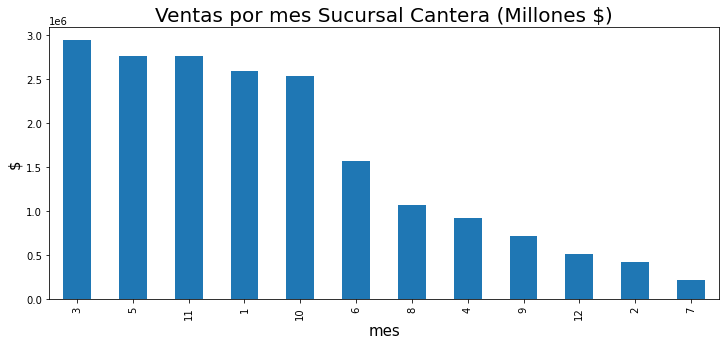

In [29]:
plt.figure(figsize=(12, 5))
dfpg = df_cantera["total"].groupby(df_cantera["mes"]).sum().sort_values(ascending=False)
plt.title(r'Ventas por mes Sucursal Cantera (Millones $)', fontsize=20)
plt.ylabel('$', size = 15)
plt.xlabel('mes', size = 15)
dfpg.plot(kind = "bar")

<AxesSubplot:title={'center':'Ventas por mes Sucursal Reliz (Millones $)'}, xlabel='mes', ylabel='$'>

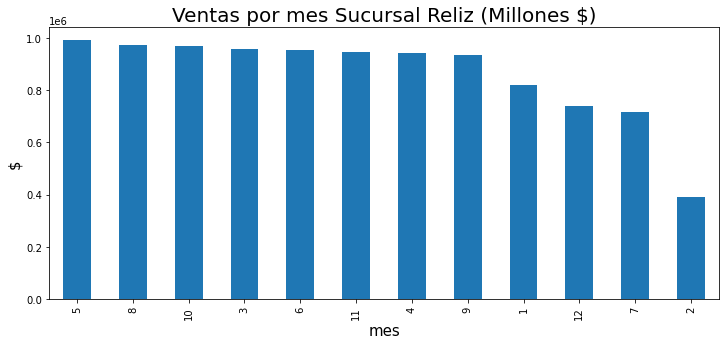

In [30]:
plt.figure(figsize=(12, 5))
dfpg = df_reliz["total"].groupby(df_reliz["mes"]).sum().sort_values(ascending=False)
plt.title(r'Ventas por mes Sucursal Reliz (Millones $)', fontsize=20)
plt.ylabel('$', size = 15)
plt.xlabel('mes', size = 15)
dfpg.plot(kind = "bar")

<AxesSubplot:title={'center':'Ventas por dia Sucursal Cantera (Millones $)'}, xlabel='dia', ylabel='$'>

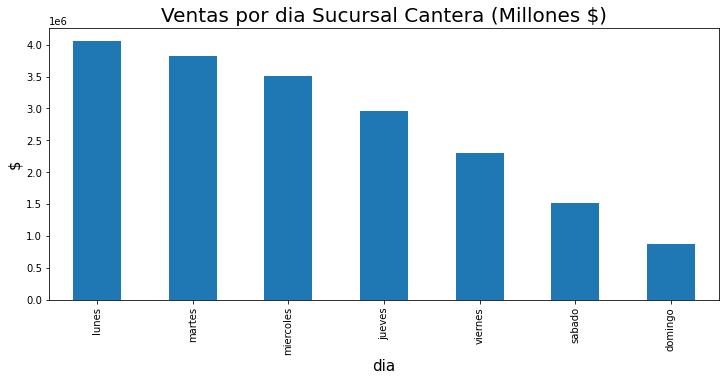

In [31]:
plt.figure(figsize=(12, 5))
dfpg = df_cantera["total"].groupby(df_cantera["dia"]).sum().sort_values(ascending=False)[:10]
plt.title(r'Ventas por dia Sucursal Cantera (Millones $)', fontsize=20)
plt.ylabel('$', size = 15)
plt.xlabel('mes', size = 15)
dfpg.plot(kind = "bar")


<AxesSubplot:title={'center':'Ventas por dia Sucursal Reliz (Millones $)'}, xlabel='dia', ylabel='$'>

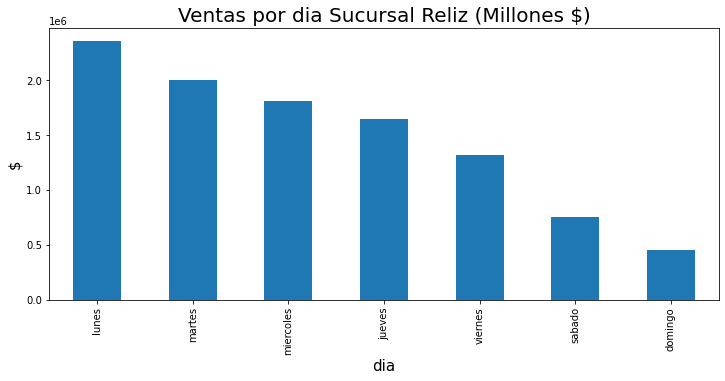

In [32]:
plt.figure(figsize=(12, 5))
dfpg = df_reliz["total"].groupby(df_reliz["dia"]).sum().sort_values(ascending=False)[:10]
plt.title(r'Ventas por dia Sucursal Reliz (Millones $)', fontsize=20)
plt.ylabel('$', size = '15')
plt.xlabel('mes', size = 15)
dfpg.plot(kind = "bar")

### Tanto en cantera como en reliz, los dias en los que mas se vende es en el inicio de semana

## Ventas por familia, subfamilia, subsubfamilia

In [33]:
df_cantera.groupby(["familia", "subfamilia", "subsubfamilia"])["total"].sum().sort_values(ascending=False)

familia                subfamilia            subsubfamilia              
PRODUCTOS  DE BASCULA  POLLO                 POLLO                          8069345.52
ABARROTES Y COMIDA     COMIDA PREPARADA      ENSALADAS                      1294130.50
PRODUCTOS  DE BASCULA  RES                   RES                            1204701.71
ABARROTES Y COMIDA     COMIDA PREPARADA      CREMAS DE FRUTOS SECOS          984647.00
                                             PLATILLO FUERTE                 961816.50
PRODUCTOS  DE BASCULA  PESCADO               PESCADO                         859033.32
ABARROTES Y COMIDA     COMIDA PREPARADA      ADEREZOS                        708207.00
                       ABARROTES             CREMAS, SOPAS Y SALSAS          521050.05
                                             TORTILLAS Y TOSTADAS            455919.58
                       COMIDA PREPARADA      FLAUTAS                         446252.75
                       ABARROTES             HUEVO Y LACT

In [34]:
df_reliz.groupby(["familia", "subfamilia", "subsubfamilia"])["total"].sum().sort_values(ascending=False)

familia                subfamilia            subsubfamilia              
PRODUCTOS  DE BASCULA  POLLO                 POLLO                          4205951.88
ABARROTES Y COMIDA     COMIDA PREPARADA      ENSALADAS                       680022.50
PRODUCTOS  DE BASCULA  RES                   RES                             657939.60
ABARROTES Y COMIDA     COMIDA PREPARADA      CREMAS DE FRUTOS SECOS          642915.00
                                             PLATILLO FUERTE                 559863.00
                                             ADEREZOS                        426140.50
                       ABARROTES             CREMAS, SOPAS Y SALSAS          391964.44
PRODUCTOS  DE BASCULA  PESCADO               PESCADO                         351574.61
ABARROTES Y COMIDA     COMIDA PREPARADA      FLAUTAS                         299191.50
                       ABARROTES             TORTILLAS Y TOSTADAS            282859.31
                                             BEBIDAS Y BO

## Cantidad por familia, subfamilia y subsubfamilia

In [36]:
df_cantera.groupby(["familia", "subfamilia", "subsubfamilia"])["quantity"].sum().sort_values(ascending=False)

familia                subfamilia            subsubfamilia              
PRODUCTOS  DE BASCULA  POLLO                 POLLO                          71198
ABARROTES Y COMIDA     ABARROTES             TORTILLAS Y TOSTADAS           16639
                       COMIDA PREPARADA      CREMAS DE FRUTOS SECOS         15205
                                             ENSALADAS                      13172
                       ABARROTES             BEBIDAS Y BOTANAS              12349
                                             CREMAS, SOPAS Y SALSAS         11773
                       COMIDA PREPARADA      FLAUTAS                         9774
                                             SALSAS Y CHILES                 8687
PRODUCTOS  DE BASCULA  RES                   RES                             8323
ABARROTES Y COMIDA     COMIDA PREPARADA      PLATILLO FUERTE                 7998
                                             ADEREZOS                        7674
PRODUCTOS  DE BASCULA  PE

In [37]:
df_reliz.groupby(["familia", "subfamilia", "subsubfamilia"])["quantity"].sum().sort_values(ascending=False)

familia                subfamilia            subsubfamilia              
PRODUCTOS  DE BASCULA  POLLO                 POLLO                          42420
ABARROTES Y COMIDA     ABARROTES             TORTILLAS Y TOSTADAS           11565
                                             BEBIDAS Y BOTANAS              10746
                       COMIDA PREPARADA      CREMAS DE FRUTOS SECOS         10180
                       ABARROTES             CREMAS, SOPAS Y SALSAS          9547
                       COMIDA PREPARADA      ENSALADAS                       7385
                                             FLAUTAS                         6857
                                             SALSAS Y CHILES                 6102
                                             PLATILLO FUERTE                 5679
                                             ADEREZOS                        5291
PRODUCTOS  DE BASCULA  RES                   RES                             4981
ABARROTES Y COMIDA     CO

### El pollo es el producto predominante en ventas desde la familia hasta la subfamilia en las dos sucursales.

In [39]:
df_cantera.groupby(["familia"])["quantity"].sum().sort_values(ascending=False)

familia
ABARROTES Y COMIDA       140856
PRODUCTOS  DE BASCULA     94858
INSUMOS                     782
Name: quantity, dtype: int64

In [40]:
df_reliz.groupby(["familia"])["quantity"].sum().sort_values(ascending=False)

familia
ABARROTES Y COMIDA       95042
PRODUCTOS  DE BASCULA    53423
INSUMOS                     74
Name: quantity, dtype: int64

In [37]:

!pip install mlxtend

In [110]:
# Apriori libraries
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [111]:
# Transactions done in Cantera
new_cantera= df_cantera.groupby(['folio', 'producto'])['quantity'].sum().unstack().reset_index().fillna(0).set_index('folio')
new_reliz= df_reliz.groupby(['folio', 'producto'])['quantity'].sum().unstack().reset_index().fillna(0).set_index('folio')

In [112]:
new_cantera

producto,A DE COCO ACEITE DE COCO 420 M,ACEITE DE AGUACATE CHOSEN FOOD,ACEITE DE COCO A DE COCO 420 M,ACEITE DE COCO CF 1 U,ACEITE DE OLIVO,ADEREZO CHICKEN FARM 250 ML,ADEREZO DE HABANERO CON ROMERO,ADEREZO DULCE CHICKEN FARM 25,ADEREZO ITALIANO CHICKEN FARM,AGUA 500 ML,...,WALDEN FARMS CAESAR 355 ML,WALDEN FARMS CHIPOTLE RANCH,WALDEN FARMS ITALIAN CF 355 ML,WISH BONE CHUNKY BLUE CHEESE,WISH BONE ITALIAN 237 ML,WISH BONE VINAGRETTE,ZONE PERFECT CHOCOLATE PEANUT,ZONE PERFECT DARK CHOCOLATE 50,ZONE PERFECT FUDGE GRAHAM 50 G,ZONE PERFECTCINNAMON ROLL
folio,,,,,,,,,,,,,,,,,,,,,
27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
146524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
146525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [113]:
 #Defining the hot encoding function to make the data suitable
# for the concerned libraries
def hot_encode(x):
    if(x<= 0):
        return 0
    if(x>= 1):
        return 1


In [114]:
# Encoding the datasets
basket_encoded = new_cantera.applymap(hot_encode)
new_cantera = basket_encoded

new_reliz = new_reliz.applymap(hot_encode)


In [115]:
new_cantera

producto,A DE COCO ACEITE DE COCO 420 M,ACEITE DE AGUACATE CHOSEN FOOD,ACEITE DE COCO A DE COCO 420 M,ACEITE DE COCO CF 1 U,ACEITE DE OLIVO,ADEREZO CHICKEN FARM 250 ML,ADEREZO DE HABANERO CON ROMERO,ADEREZO DULCE CHICKEN FARM 25,ADEREZO ITALIANO CHICKEN FARM,AGUA 500 ML,...,WALDEN FARMS CAESAR 355 ML,WALDEN FARMS CHIPOTLE RANCH,WALDEN FARMS ITALIAN CF 355 ML,WISH BONE CHUNKY BLUE CHEESE,WISH BONE ITALIAN 237 ML,WISH BONE VINAGRETTE,ZONE PERFECT CHOCOLATE PEANUT,ZONE PERFECT DARK CHOCOLATE 50,ZONE PERFECT FUDGE GRAHAM 50 G,ZONE PERFECTCINNAMON ROLL
folio,,,,,,,,,,,,,,,,,,,,,
27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146523,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
146524,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
146525,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [130]:
# Building the model
frq_items = apriori(new_cantera, min_support = 0.01, use_colnames = True)
frq_items_reliz = apriori(new_reliz, min_support = 0.01, use_colnames = True)

In [131]:
frq_items

,support,itemsets
0,0.014554,(ALITA NATURAL)
1,0.016041,(ALITA PREPARADA ORIENTAL)
2,0.039698,(ARROZ BLANCO)
3,0.050039,(ARROZ C/ ELOTE)
4,0.013563,(ARROZ CON LECHE)
...,...,...
217,0.010769,"(MILANESA PARMESANA, MILANESA RES)"
218,0.010003,"(MILANESA PARMESANA, MOLE)"
219,0.012887,"(MILANESA PARMESANA, PECHUGA S/ HUESO)"
220,0.010882,"(MILANESA PARMESANA, SPAGHETTI ROJO)"


In [118]:
#frq_items.to_csv (r'C:\Users\sesa573896\Documents\personal\frec_items.csv', index = False, header=True)

In [119]:
# Collecting the inferred rules in a dataframe
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])

rules_2 = association_rules(frq_items_reliz, metric ="lift", min_threshold = 1)
rules_2 = rules_2.sort_values(['confidence', 'lift'], ascending =[False, False])

In [120]:
rules.head(50)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
47,(DESHEBRADA DE RES CONG.),(DESMENUZADA DE POLLO CONG.),0.101498,0.201780,0.037941,0.373807,1.852548,0.017460,1.274719
156,(PECHUGA C/ HUESO),(MILANESA NATURAL),0.039157,0.125493,0.012054,0.307825,2.452929,0.007140,1.263419
45,(CHILACA TOSTADO),(DESMENUZADA DE POLLO CONG.),0.038662,0.201780,0.011130,0.287879,1.426697,0.003329,1.120905
112,(FLAUTAS DE RES CONG.),(FLAUTAS DE POLLO CONG.),0.137659,0.139191,0.037918,0.275450,1.978934,0.018757,1.188060
113,(FLAUTAS DE POLLO CONG.),(FLAUTAS DE RES CONG.),0.139191,0.137659,0.037918,0.272418,1.978934,0.018757,1.185215
81,(TORTILLA DE MAIZ),(DESMENUZADA DE POLLO CONG.),0.085479,0.201780,0.023071,0.269900,1.337595,0.005823,1.093302
133,(GUACAMOLE CHICKEN),(FLAUTAS DE RES CONG.),0.037423,0.137659,0.010071,0.269115,1.954938,0.004919,1.179858
41,(CARTERA 15 HUEVOS),(DESMENUZADA DE POLLO CONG.),0.054748,0.201780,0.013901,0.253909,1.258349,0.002854,1.069870
61,(FAJITA MIX POLLO),(DESMENUZADA DE POLLO CONG.),0.040059,0.201780,0.010116,0.252531,1.251517,0.002033,1.067897
151,(MILANESA CHIPOTLE),(MILANESA PARMESANA),0.063512,0.139867,0.015906,0.250443,1.790582,0.007023,1.147522


In [132]:
rules.to_csv (r'C:\Users\Usuario\Desktop\Proyecto Ingenieria\rules_cantera_producto.csv', index = False, header=True)

In [122]:
rules_2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5,(FLAUTAS DE POLLO CONG.),(FLAUTAS DE RES CONG.),0.069552,0.071194,0.014442,0.207643,2.916572,0.009490,1.172206
4,(FLAUTAS DE RES CONG.),(FLAUTAS DE POLLO CONG.),0.071194,0.069552,0.014442,0.202855,2.916572,0.009490,1.167225
1,(DESHEBRADA DE RES CONG.),(DESMENUZADA DE POLLO CONG.),0.056947,0.122376,0.011296,0.198353,1.620842,0.004327,1.094775
3,(TORTILLA DE MAIZ),(DESMENUZADA DE POLLO CONG.),0.066699,0.122376,0.012820,0.192206,1.570616,0.004658,1.086445
2,(DESMENUZADA DE POLLO CONG.),(TORTILLA DE MAIZ),0.122376,0.066699,0.012820,0.104759,1.570616,0.004658,1.042513
0,(DESMENUZADA DE POLLO CONG.),(DESHEBRADA DE RES CONG.),0.122376,0.056947,0.011296,0.092303,1.620842,0.004327,1.038951


In [123]:
rules_2.to_csv (r'C:\Users\Usuario\Desktop\Proyecto Ingenieria\rules_reliz_producto.csv', index = False, header=True)

# Apriori con subsubfamilia

In [88]:
new_cantera_subsub = df_cantera.groupby(['folio', 'subsubfamilia'])['quantity'].sum().unstack().reset_index().fillna(0).set_index('folio')
new_reliz_subsub = df_reliz.groupby(['folio', 'subsubfamilia'])['quantity'].sum().unstack().reset_index().fillna(0).set_index('folio')

In [85]:
new_cantera_subsub

subsubfamilia,ABARROTES Y SEMILLAS,ACEITES Y ADEREZOS,ADEREZOS,BEBIDAS Y BOTANAS,CALDOS,"CEREALES, GALLETAS Y PASTAS",CEVICHES,CREMAS DE FRUTOS SECOS,"CREMAS, SOPAS Y SALSAS",ENSALADAS,...,POLLO,POSTRES,PRODUCTOS CARNICOS,PRODUCTOS CASEROS,PURES,RES,SALSAS Y CHILES,"TE'S, SEMILLAS Y SECOS",TORTILLAS Y TOSTADAS,VERDURA
folio,,,,,,,,,,,,,,,,,,,,,
28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,...,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146523,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
146524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
146525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [90]:
new_reliz_subsub.count()

subsubfamilia
ABARROTES Y SEMILLAS           51142
ACEITES Y ADEREZOS             51142
ADEREZOS                       51142
BEBIDAS Y BOTANAS              51142
CALDOS                         51142
CEREALES, GALLETAS Y PASTAS    51142
CEVICHES                       51142
CREMAS DE FRUTOS SECOS         51142
CREMAS, SOPAS Y SALSAS         51142
ENSALADAS                      51142
FLAUTAS                        51142
HARINAS                        51142
HUEVO Y LACTEO                 51142
INSUMOS                        51142
LACTEOS                        51142
MIELES Y JARABES               51142
PESCADO                        51142
PLATILLO FUERTE                51142
POLLO                          51142
POSTRES                        51142
PRODUCTOS CARNICOS             51142
PRODUCTOS CASEROS              51142
PURES                          51142
RES                            51142
SALSAS Y CHILES                51142
TE'S, SEMILLAS Y SECOS         51142
TORTILLAS Y TOSTADAS    

In [93]:
new_cantera_subsub.count()

subsubfamilia
ABARROTES Y SEMILLAS           44377
ACEITES Y ADEREZOS             44377
ADEREZOS                       44377
BEBIDAS Y BOTANAS              44377
CALDOS                         44377
CEREALES, GALLETAS Y PASTAS    44377
CEVICHES                       44377
CREMAS DE FRUTOS SECOS         44377
CREMAS, SOPAS Y SALSAS         44377
ENSALADAS                      44377
FLAUTAS                        44377
HARINAS                        44377
HUEVO Y LACTEO                 44377
INSUMOS                        44377
LACTEOS                        44377
MIELES Y JARABES               44377
PESCADO                        44377
PLATILLO FUERTE                44377
POLLO                          44377
POSTRES                        44377
PRODUCTOS CARNICOS             44377
PRODUCTOS CASEROS              44377
PURES                          44377
RES                            44377
SALSAS Y CHILES                44377
TE'S, SEMILLAS Y SECOS         44377
TORTILLAS Y TOSTADAS    

In [94]:
# Encoding the datasets
basket_encoded1 = new_cantera_subsub.applymap(hot_encode)
new_cantera_subsub = basket_encoded1

In [95]:
basket_encoded2 = new_reliz_subsub.applymap(hot_encode)
new_reliz_subsub = basket_encoded2

In [96]:
new_reliz_subsub

subsubfamilia,ABARROTES Y SEMILLAS,ACEITES Y ADEREZOS,ADEREZOS,BEBIDAS Y BOTANAS,CALDOS,"CEREALES, GALLETAS Y PASTAS",CEVICHES,CREMAS DE FRUTOS SECOS,"CREMAS, SOPAS Y SALSAS",ENSALADAS,...,POLLO,POSTRES,PRODUCTOS CARNICOS,PRODUCTOS CASEROS,PURES,RES,SALSAS Y CHILES,"TE'S, SEMILLAS Y SECOS",TORTILLAS Y TOSTADAS,VERDURA
folio,,,,,,,,,,,,,,,,,,,,,
15,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
16,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
17,0,0,0,0,0,0,0,0,1,0,...,1,1,0,0,0,0,0,0,0,0
18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132178,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
132179,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
132180,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [97]:
# Building the model
frq_items_cantera_subsub = apriori(new_cantera_subsub, min_support = 0.01, use_colnames = True)

In [98]:
frq_items_reliz_subsub = apriori(new_reliz_subsub, min_support = 0.01, use_colnames = True)

In [99]:
frq_items_cantera_subsub

,support,itemsets
0,0.013137,(ABARROTES Y SEMILLAS)
1,0.016675,(ACEITES Y ADEREZOS)
2,0.154044,(ADEREZOS)
3,0.220317,(BEBIDAS Y BOTANAS)
4,0.117268,"(CEREALES, GALLETAS Y PASTAS)"
...,...,...
687,0.012349,"(POLLO, RES, TORTILLAS Y TOSTADAS, LACTEOS)"
688,0.013543,"(POLLO, TORTILLAS Y TOSTADAS, LACTEOS, SALSAS ..."
689,0.010095,"(POLLO, PESCADO, RES, TORTILLAS Y TOSTADAS)"
690,0.011718,"(POLLO, PLATILLO FUERTE, TORTILLAS Y TOSTADAS,..."


In [100]:
frq_items_reliz_subsub

,support,itemsets
0,0.096437,(ADEREZOS)
1,0.175179,(BEBIDAS Y BOTANAS)
2,0.070568,"(CEREALES, GALLETAS Y PASTAS)"
3,0.186187,(CREMAS DE FRUTOS SECOS)
4,0.171581,"(CREMAS, SOPAS Y SALSAS)"
...,...,...
131,0.011009,"(POLLO, FLAUTAS, SALSAS Y CHILES)"
132,0.016816,"(POLLO, FLAUTAS, TORTILLAS Y TOSTADAS)"
133,0.012377,"(POLLO, TORTILLAS Y TOSTADAS, LACTEOS)"
134,0.012280,"(POLLO, RES, TORTILLAS Y TOSTADAS)"


In [101]:
# Collecting the inferred rules in a dataframe
rules_cantera_subsub = association_rules(frq_items_cantera_subsub, metric ="lift", min_threshold = 1)
rules_cantera_subsub = rules_cantera_subsub.sort_values(['confidence', 'lift'], ascending =[False, False])

In [102]:
rules_reliz_subsub = association_rules(frq_items_reliz_subsub, metric ="lift", min_threshold = 1)
rules_reliz_subsub = rules_reliz_subsub.sort_values(['confidence', 'lift'], ascending =[False, False])

In [103]:
rules_cantera_subsub.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3897,"(PESCADO, TORTILLAS Y TOSTADAS, ENSALADAS)",(POLLO),0.012326,0.73457,0.010929,0.886654,1.207039,0.001875,2.341780
4089,"(PESCADO, RES, TORTILLAS Y TOSTADAS)",(POLLO),0.011402,0.73457,0.010095,0.885375,1.205298,0.001720,2.315650
3925,"(ENSALADAS, RES, TORTILLAS Y TOSTADAS)",(POLLO),0.016608,0.73457,0.014535,0.875170,1.191404,0.002335,2.126327
2965,"(PESCADO, TORTILLAS Y TOSTADAS, BEBIDAS Y BOTA...",(POLLO),0.011605,0.73457,0.010118,0.871845,1.186878,0.001593,2.071161
3447,"(PESCADO, TORTILLAS Y TOSTADAS, CREMAS DE FRUT...",(POLLO),0.015571,0.73457,0.013430,0.862518,1.174181,0.001992,1.930656


In [104]:
rules_reliz_subsub.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
174,"(CREMAS DE FRUTOS SECOS, SALSAS Y CHILES)",(POLLO),0.022037,0.546928,0.013199,0.598935,1.095089,0.001146,1.129672
232,"(TORTILLAS Y TOSTADAS, SALSAS Y CHILES)",(POLLO),0.031129,0.546928,0.017970,0.577261,1.055461,0.000944,1.071754
222,"(TORTILLAS Y TOSTADAS, LACTEOS)",(POLLO),0.021548,0.546928,0.012377,0.574410,1.050248,0.000592,1.064574
209,"(ENSALADAS, TORTILLAS Y TOSTADAS)",(POLLO),0.021157,0.546928,0.011986,0.566543,1.035864,0.000415,1.045253
144,"(BEBIDAS Y BOTANAS, SALSAS Y CHILES)",(POLLO),0.021059,0.546928,0.011908,0.565460,1.033883,0.000390,1.042646


In [105]:
rules_reliz_subsub.to_csv (r'C:\Users\Usuario\Desktop\Proyecto Ingenieria\rules_reliz_subsub.csv', index = False, header=True)

In [106]:
rules_cantera_subsub.to_csv (r'C:\Users\Usuario\Desktop\Proyecto Ingenieria\rules_cantera_subsub.csv', index = False, header=True)